# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set in basedi

In [4]:
#theory=lya_theory.LyaTheory(zs,emulator=emu)
theory=lya_theory.get_mock_theory(zs,emulator=emu)

Note: redshifts have been re-sorted (earliest first)


In [9]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
# ignore emulator covariance for now
ignore_emu_cov=True
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,min_kp_kms=min_kp_kms,
                           verbose=False,ignore_emu_cov=ignore_emu_cov)

In [10]:
for p in like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -1.03436530241446 -1.5 -0.5
ln_tau_1 3.6744666006830182 2.5 3.8
ln_gamma_0 0.3295042060454974 0.09531017980432493 0.6931471805599453
ln_kF_0 -0.8077668277205104 -2.995732273553991 -0.6931471805599453


In [11]:
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True,nwalkers=10)

use input likelihood
setup with 10 walkers
set 10 walkers with 4 dimensions
asked to emulate model {'Delta2_p': 0.6300728199380837, 'n_p': -2.2994793220516994, 'alpha_p': -0.2163759661951201, 'f_p': 0.9583552547543478, 'mF': 0.8099611332311286, 'gamma': 1.7264111991290554, 'sigT_Mpc': 0.15238550478390972, 'kF_Mpc': 4.094780470062107}
asked to emulate model {'Delta2_p': 0.36031650137680626, 'n_p': -2.2994794594828254, 'alpha_p': -0.21637600594737977, 'f_p': 0.9813695511850136, 'mF': 0.6117765337566082, 'gamma': 1.6056038293137787, 'sigT_Mpc': 0.13864693323079097, 'kF_Mpc': 7.992252931816767}
asked to emulate model {'Delta2_p': 0.23205325295753354, 'n_p': -2.299479861066885, 'alpha_p': -0.216376343226051, 'f_p': 0.9898232760729386, 'mF': 0.38771571733106247, 'gamma': 1.5177511097877074, 'sigT_Mpc': 0.11877445527906401, 'kF_Mpc': 13.54720382120146}
asked to emulate model {'Delta2_p': 0.6300728199380837, 'n_p': -2.2994793220516994, 'alpha_p': -0.2163759661951201, 'f_p': 0.9583552547543478,

### Run burn-in chains

In [12]:
sampler.like.go_silent()

In [13]:
sampler.run_burn_in(nsteps=500)

start burn-in, will do 500 steps
0 [0.50671396 0.58109896 0.61999736 0.40156144]
20 [0.51001047 0.57106682 0.59207452 0.45397095]
40 [0.51812918 0.52410084 0.60577745 0.48622493]
60 [0.50223364 0.4658849  0.57191634 0.54537637]
80 [0.50430422 0.47499503 0.48201934 0.53497251]
100 [0.50303767 0.45974669 0.49244148 0.54179353]
120 [0.50231123 0.45755773 0.49405641 0.54101453]
140 [0.50991518 0.45993026 0.41805745 0.53256441]
160 [0.50702844 0.46508608 0.46221503 0.53521891]
180 [0.50895494 0.46753662 0.41945696 0.53161801]
200 [0.5045511  0.46317595 0.45435118 0.53645376]
220 [0.49479473 0.45848756 0.52827163 0.54212832]
240 [0.50580022 0.47046032 0.43149831 0.53321337]
260 [0.50202261 0.46634466 0.45500987 0.53543577]
280 [0.49950149 0.45827332 0.44953195 0.53236333]
300 [0.49870905 0.46156301 0.48222846 0.53686228]
320 [0.49611552 0.44852852 0.53708912 0.54209776]
340 [0.50002041 0.44244887 0.47302128 0.53537008]
360 [0.50189222 0.45601378 0.45235951 0.53026197]
380 [0.50097793 0.46087

### Run main chains

In [14]:
sampler.run_chains(nsteps=2000)

0 [0.50887143 0.44574848 0.44860704 0.53179382]
20 [0.50767651 0.45770797 0.42664693 0.52732962]
40 [0.50427813 0.46284162 0.41624592 0.52825704]
60 [0.50310873 0.46775959 0.45972946 0.53277704]
80 [0.50695115 0.4551701  0.42530962 0.53099987]
100 [0.51157674 0.4676535  0.39774255 0.52400976]
120 [0.50615038 0.46704664 0.41006577 0.52000531]
140 [0.5069541  0.47398899 0.41142812 0.52150429]
160 [0.50453319 0.46385495 0.44247439 0.52721808]
180 [0.50691361 0.46620378 0.38716477 0.5207675 ]
200 [0.49758164 0.46558047 0.50138846 0.5348787 ]
220 [0.50139341 0.46435182 0.4682284  0.53153743]
240 [0.49943688 0.46738885 0.48118829 0.53355958]
260 [0.49969285 0.4639217  0.46886958 0.53335183]
280 [0.50027589 0.46010817 0.4975277  0.53725835]
300 [0.50266045 0.45399411 0.46425787 0.53356548]
320 [0.49860721 0.44974154 0.51374065 0.5389909 ]
340 [0.5024216  0.46803323 0.45937241 0.53109065]
360 [0.50578968 0.46830251 0.42129331 0.52810715]
380 [0.49703923 0.45155841 0.52146074 0.54220585]
400 [0

In [15]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.477


### Plot results in cube units (0 < x < 1)

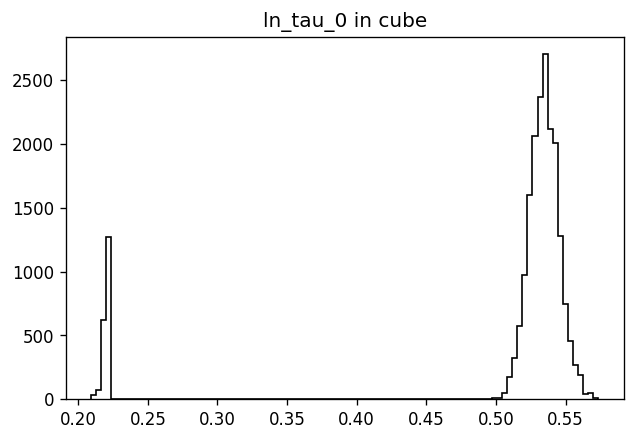

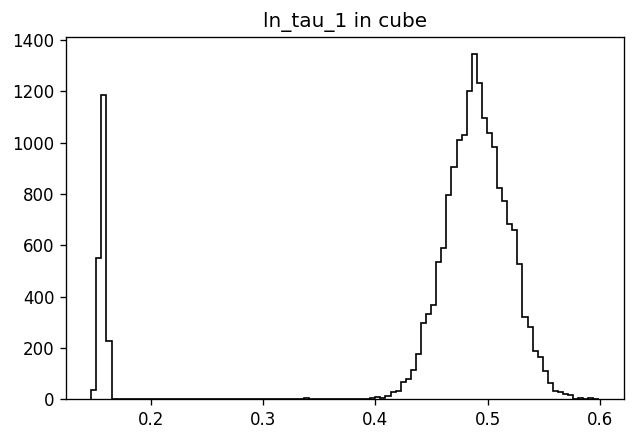

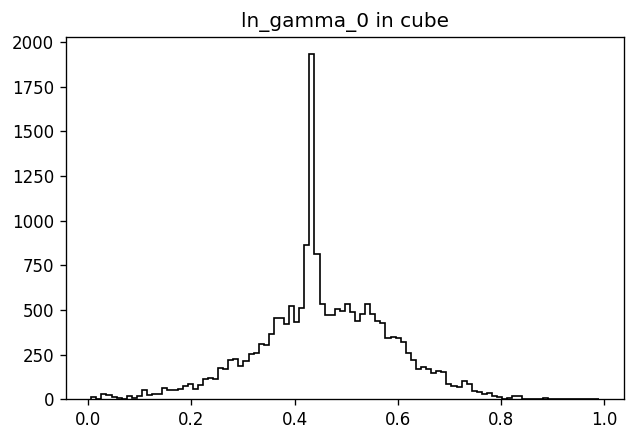

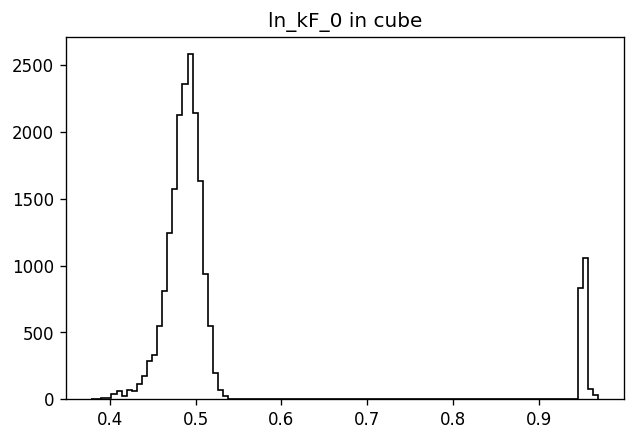

In [16]:
sampler.plot_histograms(cube=True)

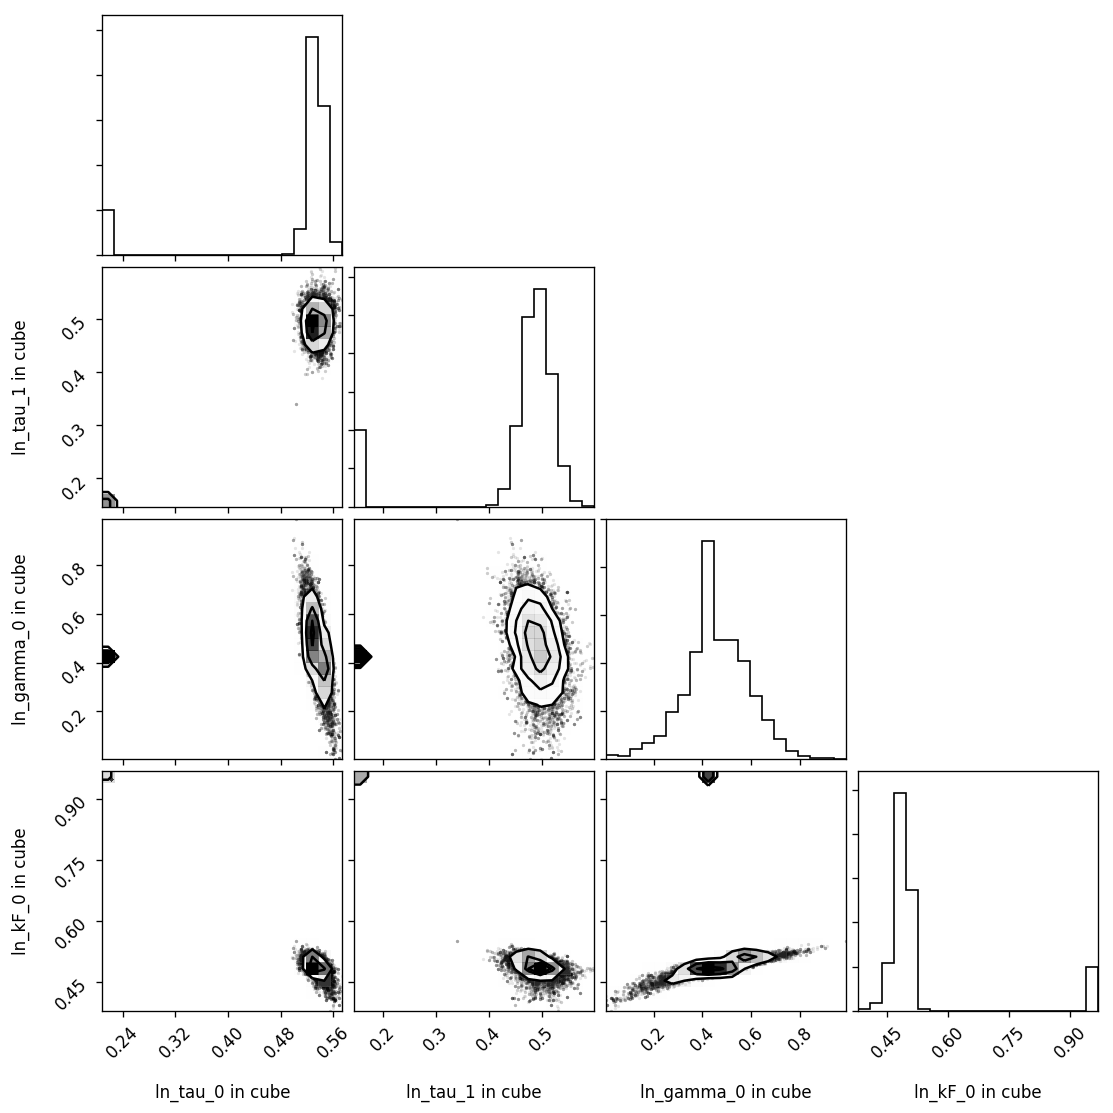

In [17]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

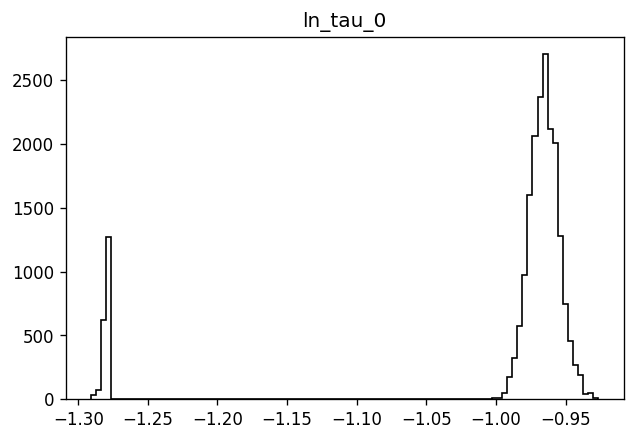

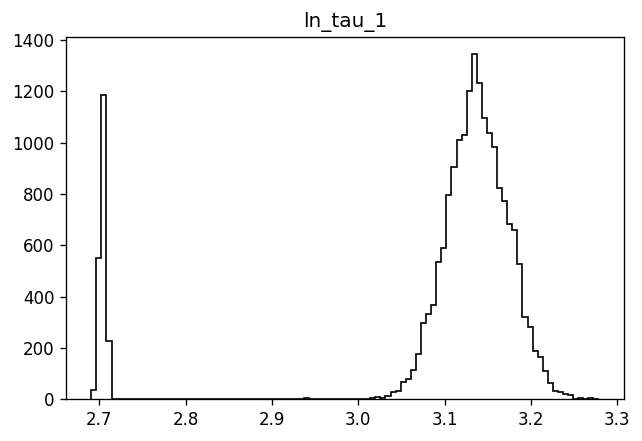

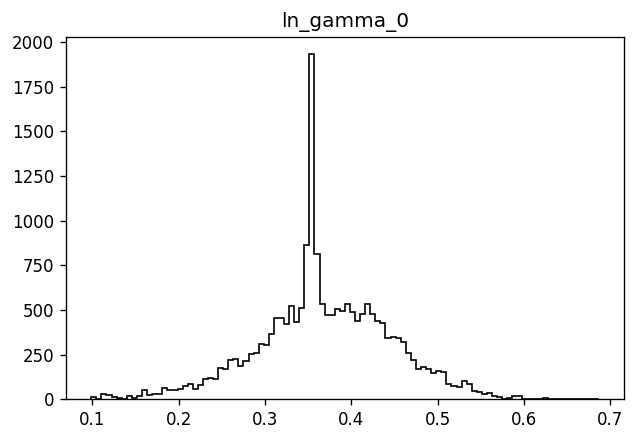

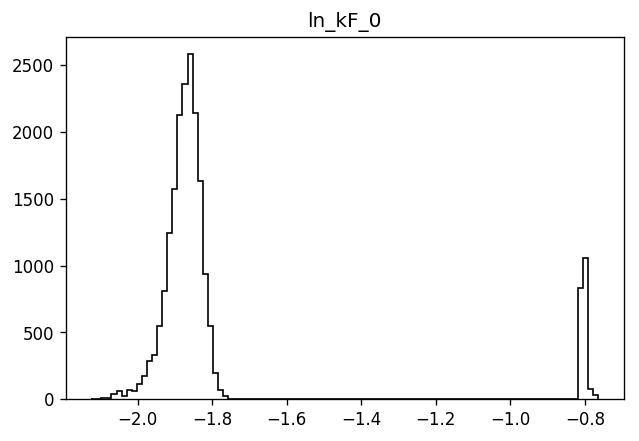

In [18]:
sampler.plot_histograms(cube=False)

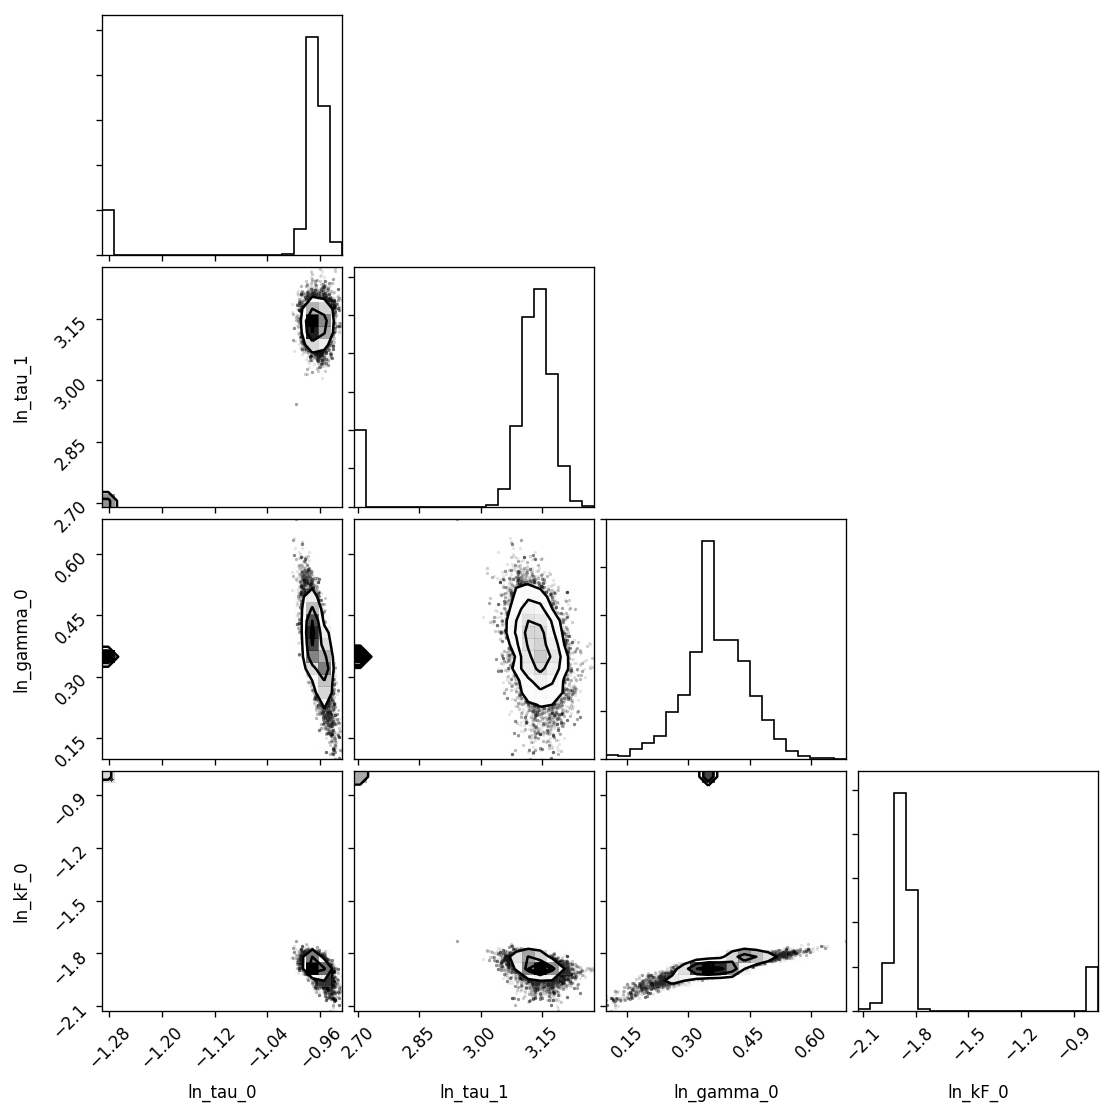

In [19]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [20]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

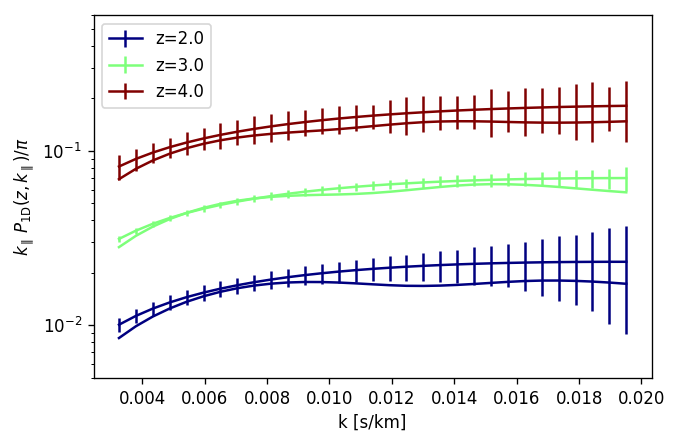

In [21]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

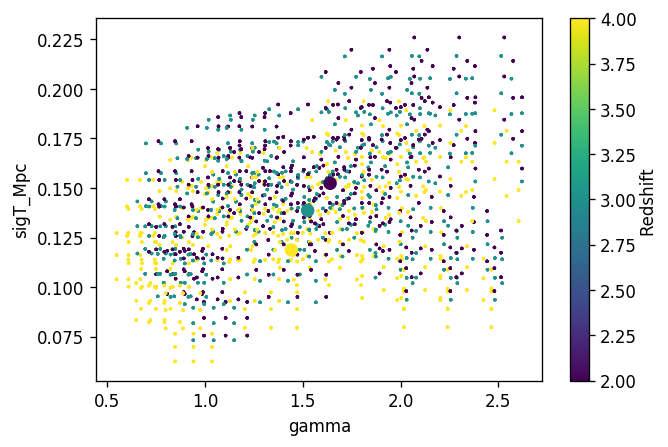

In [22]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

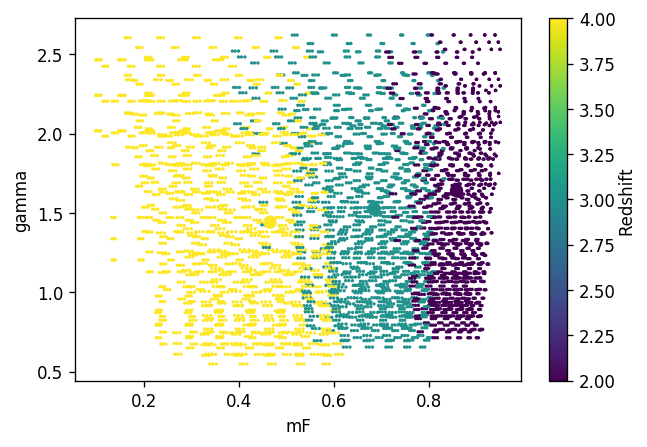

In [23]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

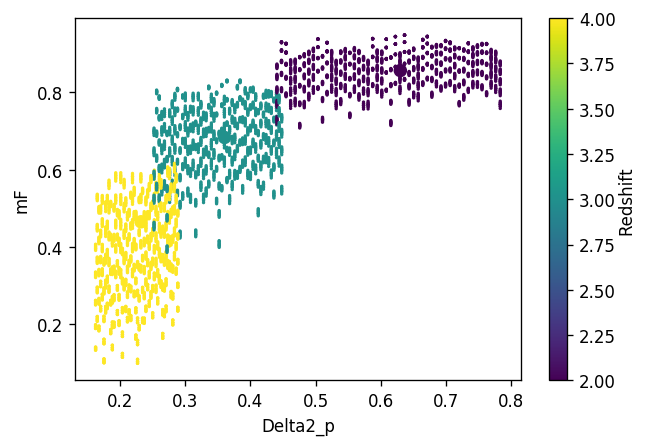

In [24]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

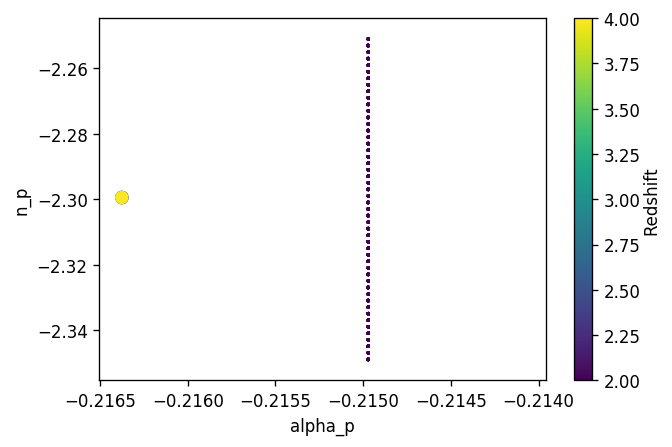

In [25]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

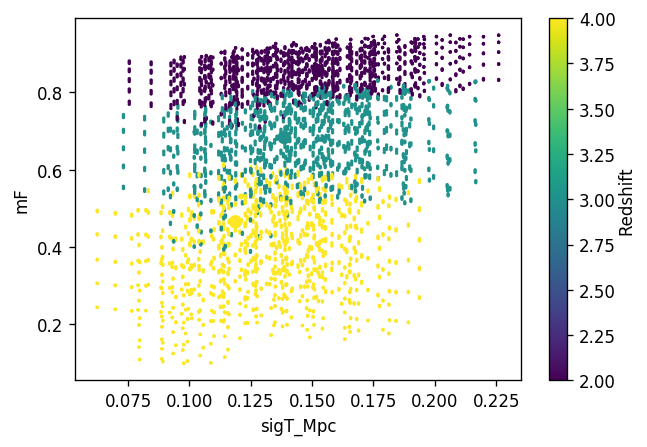

In [26]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

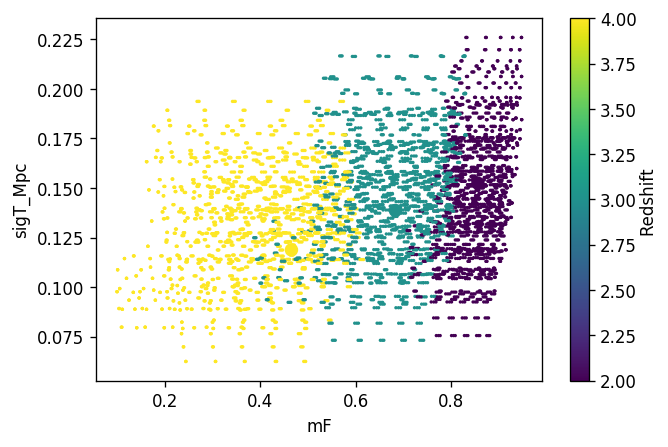

In [27]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

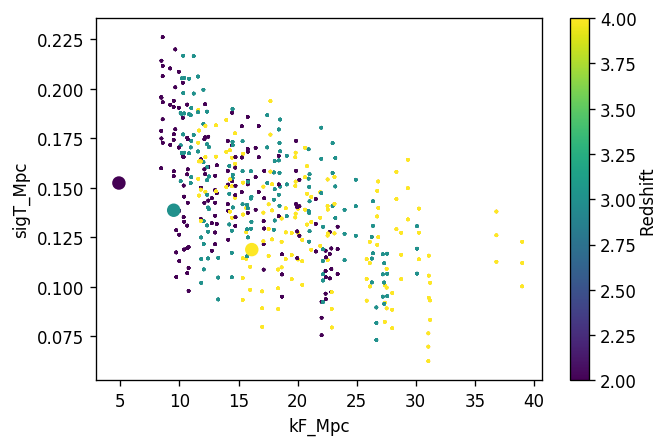

In [28]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

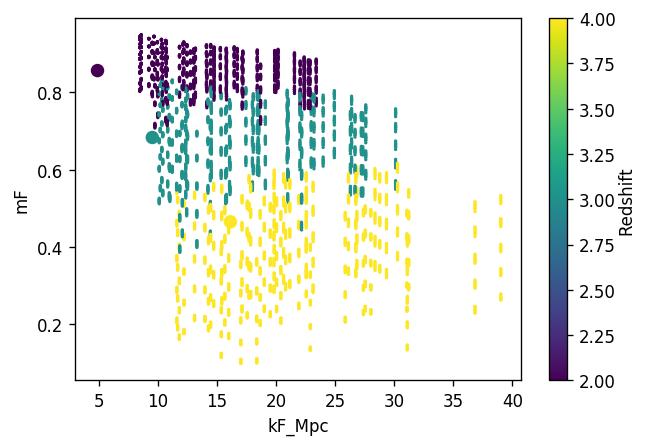

In [29]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [30]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [31]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


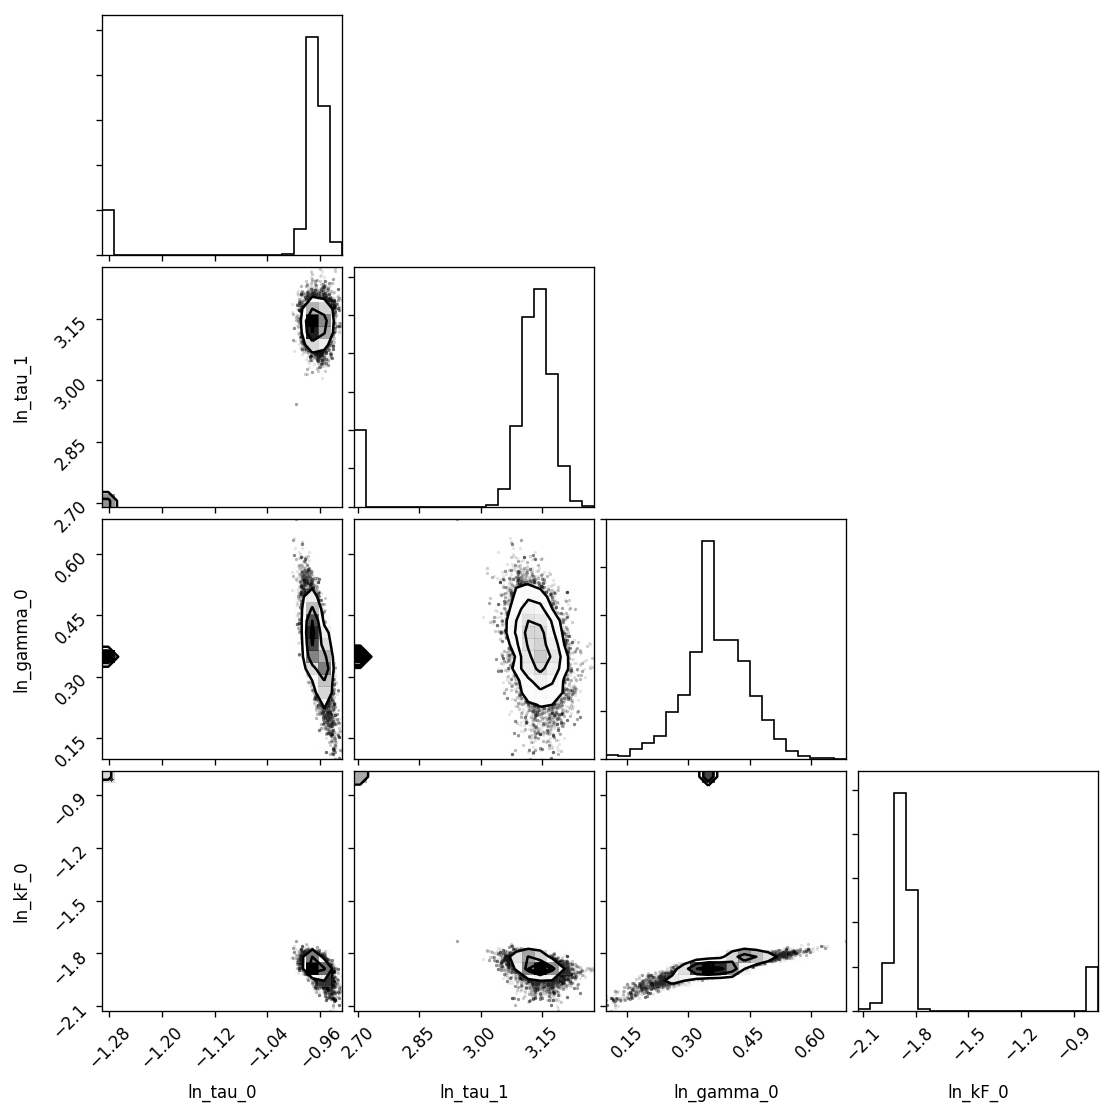

In [32]:
new_sampler.plot_corner(cube=False)

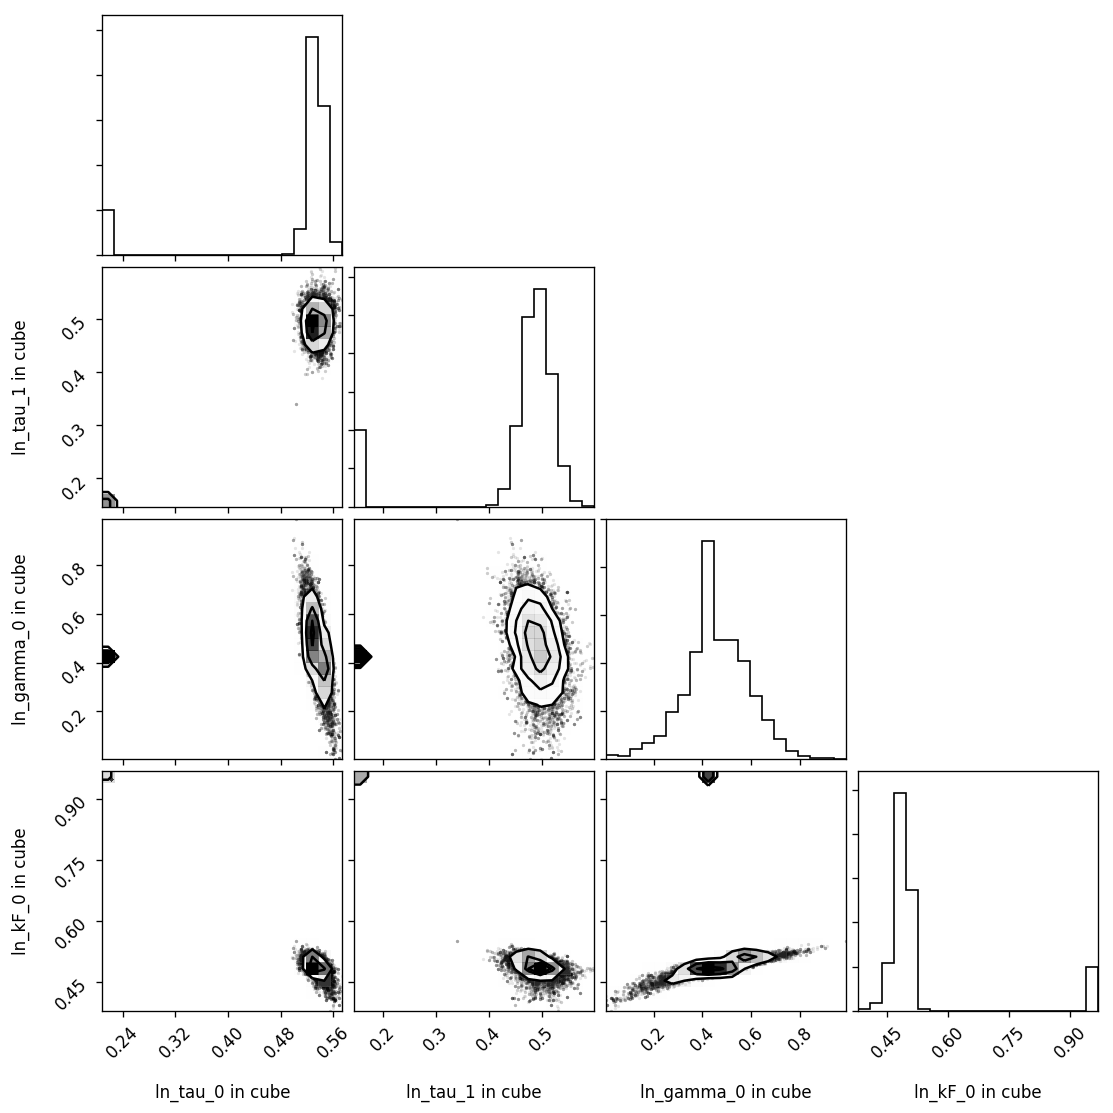

In [33]:
new_sampler.plot_corner(cube=True)

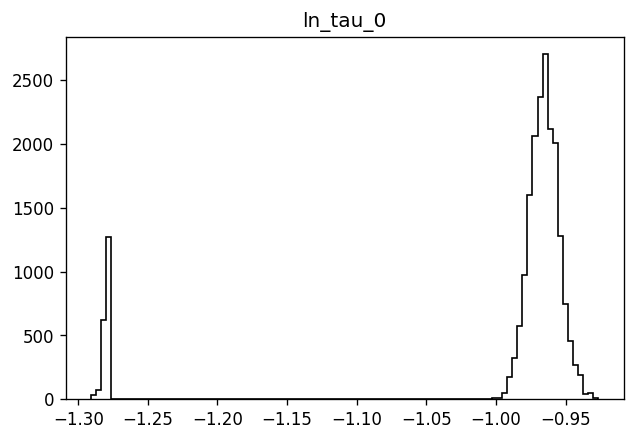

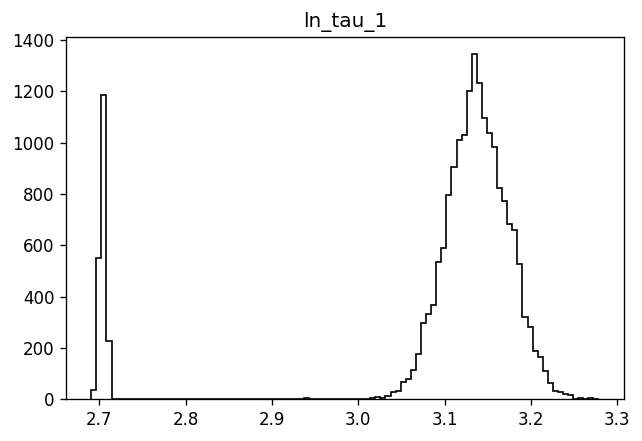

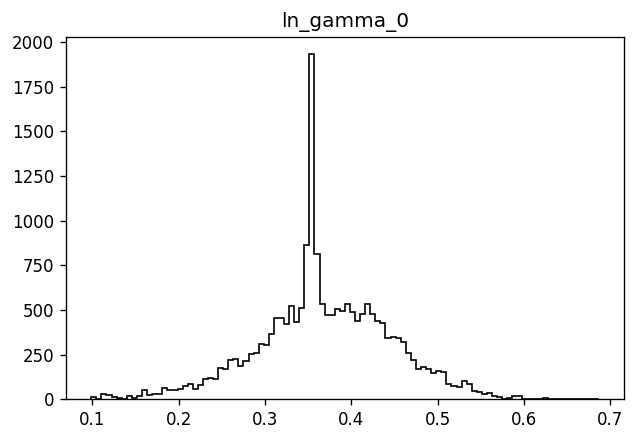

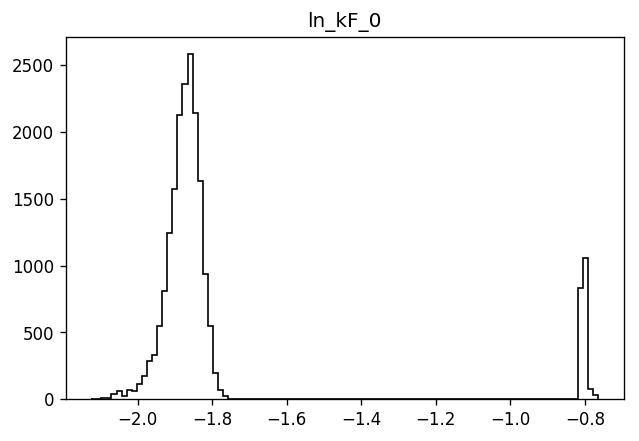

In [34]:
new_sampler.plot_histograms(cube=False)

In [36]:
np.exp(0.5)

1.6487212707001282